In [4]:
# 原点が電波窓の中心

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
r_rfw = 110
rx_length = 470
bar_width = 5
x_origin_offset = 104.5 + bar_width / 2
y_origin_offset = rx_length - 113.5 - bar_width / 2
z_offset = 72.19 - bar_width
z_interval = 10

xc_0_raw  = 131.4555
xc_10_raw = 131.15675
yc_0_raw = 123.6535
yc_10_raw = 123.2858333
yc_20_raw = 122.5325
yc_40_raw = 121.7695

xc_0 = xc_0_raw + x_origin_offset
xc_10 = xc_10_raw + x_origin_offset
yc_0 = y_origin_offset - yc_0_raw
yc_10  = y_origin_offset - yc_10_raw
yc_20 = y_origin_offset - yc_20_raw
yc_40 = y_origin_offset - yc_40_raw

In [12]:
offset = 64.2 # 天板から黒体棒までの長さ（スペーサーなし）
spr = 10

# 電波窓の中心が原点とする
x_x = numpy.array([xc_0, xc_10]) - rx_length / 2
y_x = numpy.array([0, spr])
x_y = numpy.array([yc_0, yc_10, yc_20, yc_40]) - rx_length / 2
y_y = numpy.array([0, spr, spr*2, spr*4])

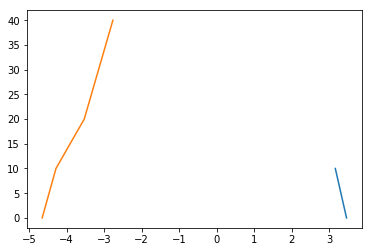

In [30]:
plt.plot(x_x, y_x)
plt.plot(x_y, y_y)
plt.show()

In [39]:
pf_x = numpy.polyfit(x_x, y_x, 1)
pf_y = numpy.polyfit(x_y, y_y, 1)
'''
_x_x = x_x[-1] - x_x[0]
_y_x = y_x[0] - y_x[-1]
_x_y = x_y[-1] - x_y[0]
_y_y = y_y[0] - y_y[-1]
'''
th_x = numpy.arctan(pf_x)[0]
th_y = numpy.arctan(pf_y)[0]

In [40]:
def function(x, pf_x):
    return pf_x[0] * x + pf_x[1]

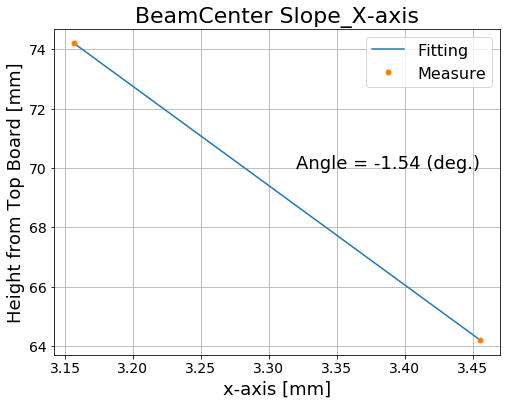

In [44]:
plt.figure(figsize=(8, 6))
x  = numpy.linspace(x_x[0], x_x[-1], 1000)
plt.plot(x, function(x, pf_x)+offset, label='Fitting')
plt.plot(x_x, y_x+offset, '.', markersize=10, label='Measure')

plt.title('BeamCenter Slope_X-axis', size=22)
plt.xlabel('x-axis [mm]', size=18)
plt.ylabel('Height from Top Board [mm]', size=18)
plt.text(3.32, 70, 'Angle = {} (deg.)'.format(round(th_x, 2)), size=18)
plt.grid()
plt.legend(fontsize=16, loc='upper right')
plt.tick_params(labelsize=14)

In [45]:
x_x[0] - x_x[-1]

0.29875000000001251

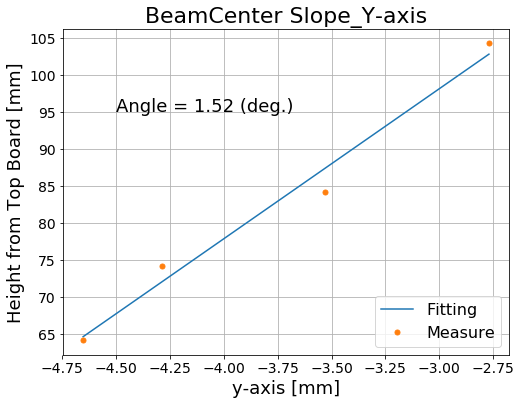

In [46]:
plt.figure(figsize=(8, 6))
x  = numpy.linspace(x_y[0], x_y[-1], 1000)
plt.plot(x, function(x, pf_y)+offset, label='Fitting')
plt.plot(x_y, y_y+offset, '.', markersize=10, label='Measure')

plt.title('BeamCenter Slope_Y-axis', size=22)
plt.xlabel('y-axis [mm]', size=18)
plt.ylabel('Height from Top Board [mm]', size=18)
plt.text(-4.50, 95, 'Angle = {} (deg.)'.format(round(th_y, 2)), size=18)
plt.grid()
plt.legend(fontsize=16, loc='lower right')
plt.tick_params(labelsize=14)

In [13]:
x_y[0]-x_y[1]

0.3676667000000009

In [34]:
numpy.arctan(20)

1.5208379310729538